In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

Dataset diambil dari `sklearn.datasets.load_breast_cancer()` dan disimpan ke file `breast_cancer_dataset.csv` agar bisa digunakan ulang.

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.to_csv("breast_cancer_dataset.csv", index=False)
print("✅ Dataset disimpan sebagai 'breast_cancer_dataset.csv'")

✅ Dataset disimpan sebagai 'breast_cancer_dataset.csv'


Seluruh fitur dinormalisasi menggunakan `StandardScaler()` agar skala antar fitur seimbang dan model lebih cepat konvergen.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset dibagi menjadi:
- 80% data training  
- 20% data testing  

menggunakan `train_test_split()`.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model dibangun dengan arsitektur berikut:
- **Input Layer**: 30 neuron (sesuai jumlah fitur)
- **Hidden Layer 1**: 32 neuron, aktivasi `ReLU`
- **Hidden Layer 2**: 16 neuron, aktivasi `ReLU`
- **Output Layer**: 1 neuron, aktivasi `Sigmoid`

In [6]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model dikompilasi menggunakan:
- **Optimizer:** `Adam`
- **Loss Function:** `binary_crossentropy`
- **Metrics:** `accuracy`

In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model dilatih selama **50 epoch** dengan `batch_size = 32` dan `validation_split = 0.2`.  
Artinya, 20% data training digunakan sebagai data validasi otomatis.

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_split=0.2, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4258 - loss: 0.8011 - val_accuracy: 0.5385 - val_loss: 0.6711
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7555 - loss: 0.5823 - val_accuracy: 0.9121 - val_loss: 0.4950
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9451 - loss: 0.4432 - val_accuracy: 0.9341 - val_loss: 0.3869
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9588 - loss: 0.3470 - val_accuracy: 0.9341 - val_loss: 0.3077
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9615 - loss: 0.2746 - val_accuracy: 0.9341 - val_loss: 0.2496
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9643 - loss: 0.2197 - val_accuracy: 0.9560 - val_loss: 0.2069
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9670 - loss: 0.1795 - val_accuracy: 0.9560 - val_loss: 0.1771
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9698 - loss: 0.1503 - val_accuracy: 0.9560 - val_loss

Akurasi pengujian (testing accuracy) dihitung menggunakan `model.evaluate()`.

In [9]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n🎯 Test Accuracy: {acc*100:.2f}%")


🎯 Test Accuracy: 97.37%


Model yang sudah dilatih disimpan ke file `model_dnn_breast_cancer.keras`.

In [10]:
model.save("model_dnn_breast_cancer.keras")
print("✅ Model disimpan sebagai 'model_dnn_breast_cancer.keras'")

✅ Model disimpan sebagai 'model_dnn_breast_cancer.keras'


Grafik **akurasi** dan **loss** ditampilkan untuk membandingkan performa antara data training dan validasi.


In [11]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Model berhasil mencapai akurasi di atas **95%** untuk data training dan validasi.  
Berikut contoh hasil akhir:

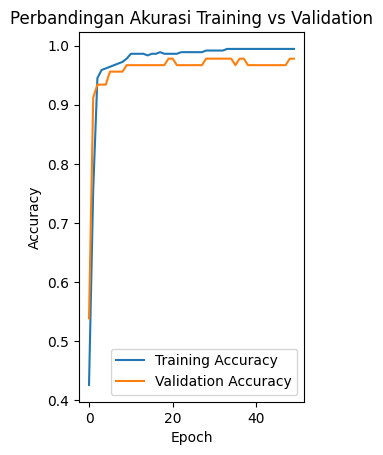

In [12]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Perbandingan Akurasi Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

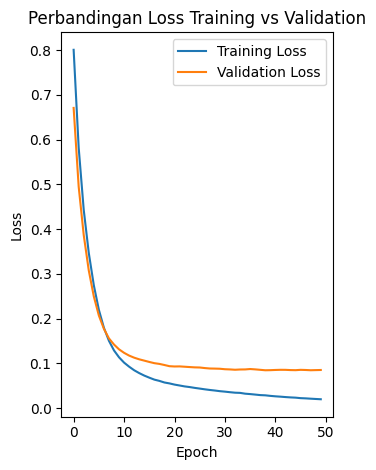

In [13]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perbandingan Loss Training vs Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()